# FONCTIONS PERSONNALISEES R-NIAYES 2040

##### GRAPHIQUE PAR SIMULATION

- création de dossiers voulus lorsqu'ils n'existent pas

In [1]:

create_folder=function(x,path=getwd()){
  
  for (f in x){
    
    folder<-file.path(path, f)
    
    if (!dir.exists(folder)){
      dir.create(folder)
      print(paste(f,"has been created!"))
    } else {
      print(paste(folder,"already exists!"))}
  }
}

- split bar

In [2]:
split_bar<-function(x){
    as.list(strsplit(tools::file_path_sans_ext(x),
                     '/')[[1]])[-1]
}

In [3]:
split_bar8<-function(x){
    as.list(strsplit(tools::file_path_sans_ext(x),
                     '_')[[1]])[-1]
}

- rechercher les fichiers voulu dans le répertoire initial

In [4]:
find_myfiles=function(files=NULL,ext=NULL,
                      patt=NULL,dir=NULL,
                      fold=NULL){
    initdir<-getwd()
    
    if (is.null(dir)){dir<-getwd()}
    if (!is.null(fold)){dir<-file.path(dir,fold)}
    
    setwd(dir)
    
    #tous les dossiers du repertoire de travail
    all_work_dir<-list.dirs(path = ".",
    full.names = TRUE, recursive = TRUE)

    #list des chemins des fichiers recherchés
    list_path<-c()
    
   #si le nom du fichier est précisé
    if (!is.null(files)){
        for (file in files){
            
            ##si l'extension du fichier est donnée
            
            if(!is.null(ext)){
                file<-tools::file_path_sans_ext(file)
                
                files_path<-reader::find.file(paste(file,
                ext,sep=""),dir=dir,dirs=all_work_dir)
                
                #si un pattern est donné
                
                if (!is.null(patt)){
                    
                    files_path<-
                    Filter(function(x) grepl(paste(ext,
                                    "$",sep=""), x),
                           list.files(files_path,
                                      pattern = patt,
                                      full.names=T))}
                
                list_path<-c(list_path,files_path)
            }
            
            ##si l'extension n'est pas donnée 
            #et que l'extension n'est pas dans le nom
            
            if(is.null(ext) & (tools::file_ext(file)=="")){
                
                print("Ajoutez l'extension au nom du fichier!!")
                print("Si le problème, 
                persiste alors le fichier n'existe probablement 
                pas dans ce répertoire!!")}
            
            ##si l'extension n'est pas donnée 
            #et que l'extension est dans le nom
            
            if(is.null(ext) & (tools::file_ext(file)!="")){
                
                ext<-tools::file_ext(file)
                files_path<-reader::find.file(file,
                            dir=dir,dirs=all_work_dir)
                
                #si un pattern est donné
                
                if (!is.null(patt)){
                    
                    files_path<-list.files(files_path,
                                           pattern = patt)}
            }
        }
        list_path<-c(list_path,files_path)
    }
        
           #si le nom du fichier n'est pas précisé
    
    if(is.null(files)){
        print("pas de nom fichier")
        
        ##si l'extension du fichier n'est pas donnée
        
        if(is.null(ext) & (!is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di,pattern = patt,full.names=T)
                list_path<-c(list_path,p)}
        }
        
        if(is.null(ext) & (is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di)
                list_path<-c(list_path,p,full.names=T)}
        }
        
        ##si l'extension du fichier est donnée
        
        if(!is.null(ext) & (!is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di,pattern = patt,full.names=T)
                p<-Filter(function(x) grepl(paste(ext,
                                    "$",sep=""), x),p)
                          list_path<-c(list_path,p)}
                          }
                          
            if(is.null(ext) & (is.null(patt))){
                
                for (di in all_work_dir){
                    p<-list.files(di,full.names=T)
                    p<-Filter(function(x) grepl(paste(ext,
                                        "$",sep=""),x),p)
                    list_path<-c(list_path,p)}
                              }
                    list_path}
                    setwd(initdir)
    return(list_path)}

- copier ou déplacer des données dans les bons dossiers à partir des sorties brutes

In [5]:
rename_rfile <- function (file=file,updat=file,
                          cdir=NULL,dir=NULL){
    
    if(!is.null(dir)){file<-file.path(dir,file)
                      updat<-file.path(dir,updat)}
    
    if (file.exists(file)) {
        file.rename(file,updat)

    } else {
        cat("The file does not exist")
    }
}

- copier ou déplacer des données dans les bons dossiers à partir des sorties brutes

In [6]:
tranf_scenario=function(full.pth,
                        new_f="scenarios",
                        methode="copy"){
    
    full.pth<-gsub("^./","data/simulations/",full.pth)

    d<-split_bar(full.pth)

    current_f<-paste(d[-length(d)],collapse="/")
    
    file<-paste(d[[length(d)]],".csv",sep="")
    
     if (methode=="copy"){ 
         file.copy(file.path("data",
                            current_f,file),new_f)
         
         
     }
    
    if (methode=="move"){
         filesstrings::file.move(file.path("data",
                    current_f,file),new_f)
     }
    
    #n1<-split_bar8(d[[2]])[[6]]
    #n2<-split_bar8(d[[2]])[[8]]
    
    updat<-gsub(d[[3]],
                paste(c("scenario",d[[2]],
                d[[length(d)]]),collapse="_"),
                d[[3]])
    
    updat<-paste(updat,".csv",sep="")

     
     rename_rfile(dir=new_f,file=file,updat=updat)
 }

- Récuperer les données Scénarios Simulée pour les copier dans le dossier prévu pour

In [7]:
get_My_scenario<-function(scenario="piezo",
                          dir="data",
                          fold="simulations",
                          ext=".csv",
                          f="scenarios"){
    new_f<-file.path(f,scenario)
    create_folder(new_f)
    create_folder(f)
    
    
    scenario_dir<-find_myfiles(patt=scenario,
                               ext=ext,
                               fold=fold,
                               dir=dir)
    
    for (ri in scenario_dir){
        tranf_scenario(ri,new_f=new_f)}
}

- lecture tableau excel/csv...

In [8]:
rcsv_sep=function(file_path){
    L <- readLines(file_path, n = 1)
    if (grepl(";", L)) read.csv2(file_path) else read.csv(file_path)
    }

#### Visualisation scénarios Piezo

RMSE des scénarios

In [9]:
rmse=function(x,y){
    sqrt( sum((x-y)^2,na.rm=TRUE )/length(y))
}

In [10]:
rmse_agg_dgpz=function(obs,simul,cell){
    
    #calcule du RMSE moyen
    r<-c()
    dg<-c()
    for (cel in unique(cell)){
        
        a<-rmse(obs[which(cell==cel)],
               simul[which(cell==cel)])
        r<-c(r,a)
        dg<-c(dg,cel)
    }
    
    
    g1<-mean(r[which(grepl('DGPZ',dg))],na.rm=TRUE)
    g2<-mean(r[!which(grepl('DGPZ',dg))],na.rm=TRUE)
    
    res<-mean(c(g1,g2),na.rm=TRUE)
    return(res)
}

Nash-efficiency

In [11]:
denom_nash=function(x){
    m<-mean(x,na.rm=TRUE )
    sqrt( sum((x-m)^2,na.rm=TRUE )/length(x))
}

In [12]:
nash_sutcliffe=function(obs,simul,cell){
    
    #calcule du RMSE moyen
    r<-c()
    dg<-c()
    for (cel in unique(cell)){
        
        a<-rmse(obs[which(cell==cel)],
               simul[which(cell==cel)])
        
        dn<-denom_nash(obs[which(cell==cel)])
        
        a<-1-(a/dn)
        r<-c(r,a)
        dg<-c(dg,cel)
    }
    
    
    g1<-mean(r[which(grepl('DGPZ',dg))],na.rm=TRUE)
    g2<-mean(r[!which(grepl('DGPZ',dg))],na.rm=TRUE)
    
    res<-mean(c(g1,g2),na.rm=TRUE)
    return(res)
    
}

- formatage tableau de rimulation

In [13]:
format_simul=function(data,start=NULL,end=NULL,cel=-1){
    
    if (is.null(start)){
        start="2008-01-01"}
    if (is.null(end)){
        end="2018-12-31"}
    
    if (end=="max"|end=="m"){
        end=max(data$date)}
            
    data<-subset(data,select=c("id","date","piezo"))
    data<- transform(data, id = as.numeric(id))
    data<- transform(data, piezo = as.numeric(piezo))
    
    n<-(nchar(data$date[1])-6)
    if (n>4){
        data$date <-stringr::str_sub(data$date,1,
        nchar(data$date)-6)}

    data$date <-lubridate::parse_date_time(data$date,
                orders = c("ymd","dmy","mdy"),tz="GMT")
    
    #stations out of analysis
    out<-c("THIOUCOUGNE","PETIE","BENDIOUGA","TEBENE Pz")
    
    raster <- rcsv_sep(list.files(file.path("data",
                                  "id_cellule_station"),
                                  full.names = TRUE))
    
    raster<-raster[!(raster$stations %in% out),]
   
    library(dplyr)
    piezo<-left_join(data,raster,by = c("id" = "cellules"))
    
    raster<-raster %>%
            group_by(cellules) %>% 
            summarize(zone = paste(sort(unique(stations)),
            collapse="_"))

    data<-left_join(data,raster,by = c("id" = "cellules"))
    
    names(data)[names(data)=='id']<-"cellules"
    
    data<-data[which(data$cellules>cel),]
    data<-data[which(data$date>=start&data$date<=end),]
    
    return(data)}

- formatage tableau d'observation

In [14]:
format_observ=function(data,start=NULL,end=NULL,
                       station=TRUE,cel=0){
    
    if (is.null(start)){
        start="2008-01-01"}
    if (is.null(end)){
        end="2018-12-31"}
    if (end=="max"|end=="m"){
        end=max(data$date)}
    
    data<-subset(data,select=c("stations","date",
                               "piezostation"))
    
    if (!is.numeric(data$piezostation)){
        data<- transform(data,
               piezostation=as.numeric(piezostation))}
    
    n<-(nchar(data$date[1])-6)
    if (n>4){
        data$date <-stringr::str_sub(data$date,1,
        nchar(data$date)-6)}

        data$date <-lubridate::parse_date_time(data$date,
                orders = c("ymd","dmy","mdy"),tz="GMT")
    
    if (station!=TRUE){
        #stations out of analysis
        out<-c("THIOUCOUGNE","PETIE","BENDIOUGA","TEBENE Pz")
    
        raster <- rcsv_sep(list.files(file.path("data",
                                      "id_cellule_station"),
                                      full.names = TRUE))
    
        raster<-raster[!(raster$stations %in% out),]
   
        library(dplyr)
        piezo<-left_join(data,raster,by = c("id" = "cellules"))
    
        raster<-raster %>%
            group_by(cellules) %>% 
            summarize(zone = paste(sort(unique(stations)),
            collapse="_"))

        raster<-left_join(data,raster,by = c("id" = "cellules"))
    
        names(data)[names(data)=='id']<-"cellules"}

    data<-data[which(data$piezostation>cel),]
    data<-data[which(data$date>=start&data$date<=end),]
    
    return(data)}

- fonction de création d'un tableau complet a partir des scénarios et observations

In [15]:
tableau_complet=function(dir_senario="scenarios",
                         dir_observation="data/observations",
                        obs=TRUE,rf=FALSE,simul=TRUE,
                        start=NULL,end=NULL,
                         ref.patt="15"){
    
    list.path.scen<-list.files(file.path(dir_senario,
                                         "piezo"),
                               full.names = TRUE)
    
    if(rf==TRUE){
        
        print(paste("L'option rf = TRUE requiert 
       une simulation de référence à tracer"))
        
        path.ref<-list.files(dir_senario,full.names = TRUE,
                             pattern=ref.patt)
        print(path.ref)
        
        ref<-rcsv_sep(path.ref)
        
        ref<-format_simul(rcsv_sep(path.ref),
                           start=start,end=end)
        
        ref<-subset(ref,
        select=c("zone","date","piezo"))

        names(ref)[names(ref)=='zone']<-"stations"
        
        p<-split_bar(path.ref)
        names(ref)[which(names(ref)=="piezo")]<-
        tools::file_path_sans_ext(p[[length(p)]])}
    
    list.scen<-list()
    if (simul==TRUE){
        for (i in 1:length(list.path.scen)){

            #path.scen<-Filter(function(x) grepl(i,x),list.path.scen)

            path.scen<-list.path.scen[i]

            scen<-format_simul(rcsv_sep(path.scen),
                               start=start,end=end)

            scen<-subset(scen,
            select=c("zone","date","piezo"))

            names(scen)[names(scen)=='zone']<-"stations"

            q<-split_bar(path.scen)
            names(scen)[which(names(scen)=="piezo")]<-
            tools::file_path_sans_ext(q[[length(q)]])
            #"simulation"
            #tools::file_path_sans_ext(q[[length(q)]])

            list.scen[[i]]<-scen

            max_date<-unlist(lapply(list.scen,function(x) max(x$date)))
            list.scen<-list.scen[order(-unlist(max_date))] 

        }

        library(tidyverse)
        df<-list.scen %>% reduce(left_join, by = c("date","stations"))
                            }else{df<-ref}
    
    if((rf==TRUE) & (simul==TRUE)){df<-dplyr::left_join(df,ref,
        by = c("stations"="stations","date"="date"))}
    
    
    if(obs==TRUE){
        
        print(paste("L'option obs = TRUE les 
       observations seront tracées"))
        
        path.observ<-list.files("data/observations",
                                pattern="piezostation",
                                full.names = TRUE)
        observ<-rcsv_sep(path.observ)
        observ<-format_observ(observ,start=start,end=end)

        df<-dplyr::left_join(df, observ,
        by = c("stations"="stations","date"="date"))
        df<-df[which(!is.na(df$piezostation)),]}
                                
        write.csv2(df,"table_complet.csv")
        
        obs<-df$piezostation
        cell<-df$stations
        
        
        rms<-c()
        rm<-c()
        for (l in 3:dim(df)[2]){
            r<-rmse_agg_dgpz(obs,unlist(df[l]),cell)
            rs<-nash_sutcliffe(obs,unlist(df[l]),cell)
            rm<-c(rm,r)
            rms<-c(rms,rs)}
                                
        trmse<-df[which(df$stations=="lci"),
                  3:dim(df)[2]]
                                
        for (li in 1:length(rms)){
            trmse["rmse_agg_dgpz",li]<-rm[li]
            trmse["nash_sutcliffe",li]<-rms[li]}
        
        write.csv2(trmse,"rmse_scenarios.csv")
                           
    return(df)
}

In [16]:
        sf<-function(x){

            v<-unlist(split_bar8(x))
            print(x)
            print(v)
            vn<-paste(3:length(v),collapse="_")
            vm<-gsub("simul","",vn)
            vm}

- fonction de visulation des scénarios: Simulation vs Observation

In [17]:
visualisation=function(ncol=3,nrow=3,out=NULL,
                       save.name="visualisation",
                       y.lim=NULL,x.lim=NULL,
                       obs=TRUE, rf=FALSE,simul=TRUE,
                       dir_senario="scenarios",
                       dir_observation="observations",
                       start=NULL,end=NULL,
                       ref.patt="15"){
    options(warn = -1)
    library(ggplot2)
    library(ggpubr)
    
    df<-tableau_complet(obs=obs,rf=rf,ref.patt=ref.patt,
                       dir_senario=dir_senario,
                       dir_observation=dir_observation,
                       start=start,end=end,simul=simul)
    if (is.null(out)){
        out<-c('DGPZ049','DGPZ045','DGPZ051','DGPZ114',
               'DGPZ050','DGPZ110','DGPZ111','DGPZ042',
               'DGPZ112','DGPZ038','DGPZ043','DGPZ109',
               'DGPZ041','DGPZ039','DGPZ119')}
    
    nout<-na.omit(unique(df$stations))
    nout<-na.omit(nout[!nout%in%out])
    
    print(paste("sur les graphs on aura la station:",
               out))
    
    #limit axes Y
    if (is.null(y.lim)){
        
        y.lim <- list()

        for (r in 1:length(nout)){
            y.lim[[r]] <- c(0,7)
        }
    }
    
    plot_list<-list()

    for (j in 1:length(nout)){

        dt = df[which(df$stations==nout[j]),]
        # reformat the data
        data_long = data.frame(x = numeric(),
                    y = numeric(),curve=character())

        for(i in 3:length(dt)){
          y = dt[i][[1]]
          x = dt$date
          
          #if ((names(dt)[i])!="simulation_15" &
            # (names(dt)[i])!="piezostation"){
          #b<-names(dt)[i]
          #vm<-sf(b)}else{vm<-names(dt)[i]}
            
            vm<-names(dt)[i]
            
            vm[which(vm=="piezostation")]<-"données station"
            vm[which(vm=="industrie_seule")]<-"simulation"
            

            
          data_long = rbind(data_long,data.frame(x,y,
                                    curve=vm))
        }
        data_long$curve = factor(data_long$curve)

        
        #limit axes X
        
        if( is.null(x.lim)){
            x.lim <- list()
            
            for (s in 1:length(nout)){
                x.lim[[s]] <- c(min(dt$date),
                                max(dt$date))}
        }
        # create plot

        
        if (y.lim=="flottant"|y.lim=="f"){
            
            a<-ggplot(data_long,aes(x,y,color=curve))+
            geom_line()+theme_bw()+
            labs(title=nout[j],x ="date",
                 y = "piezometrie (m)")+ 
            #theme(axis.ticks.x = element_blank(),
            #axis.text.x = element_blank())+ 
            expand_limits(x=x.lim[[j]])
            plot_list[[j]]<-a}
        
        if (y.lim!="flottant" & y.lim!="f"){
             a<-ggplot(data_long,aes(x,y,color=curve))+
                geom_line()+theme_bw()+
                labs(title=nout[j],x ="date",
                     y = "piezometrie (m)")+ 
                #theme(axis.ticks.x = element_blank(),
                     # axis.text.x = element_blank())+
                expand_limits(x=x.lim[[j]],y=y.lim[[j]])

                plot_list[[j]]<-a}
    }
    
    figure <- ggarrange(plotlist = plot_list,ncol=ncol, 
                        nrow=nrow,common.legend = TRUE)
    # Export to a pdf file
    ggexport(figure, filename =paste(save.name,".tiff",sep=""))
    print(figure)
    
    #return(figure)
    return(figure)
}

- pattern name typo

In [18]:
pat=function(x){
    ker<-split_bar(x)
    ker<-ker[[length(ker)]]
    kern<-unlist(split_bar8(ker))
    kern<-unlist(split_bar8(ker))[-1]
    kern<-paste(kern[],collapse="_")
    return(kern)}

In [19]:
#get_My_scenario(scenario="piezo")
#get_My_scenario(scenario="exploitations")

 [1] "sur les graphs on aura la station: DGPZ049"
 [2] "sur les graphs on aura la station: DGPZ045"
 [3] "sur les graphs on aura la station: DGPZ051"
 [4] "sur les graphs on aura la station: DGPZ114"
 [5] "sur les graphs on aura la station: DGPZ050"
 [6] "sur les graphs on aura la station: DGPZ110"
 [7] "sur les graphs on aura la station: DGPZ111"
 [8] "sur les graphs on aura la station: DGPZ042"
 [9] "sur les graphs on aura la station: DGPZ112"
[10] "sur les graphs on aura la station: DGPZ038"
[11] "sur les graphs on aura la station: DGPZ043"
[12] "sur les graphs on aura la station: DGPZ109"
[13] "sur les graphs on aura la station: DGPZ041"
[14] "sur les graphs on aura la station: DGPZ039"
[15] "sur les graphs on aura la station: DGPZ119"
[1] "visualisation%03d.tiff"


file saved to visualisation%03d.tiff



$`1`

$`2`


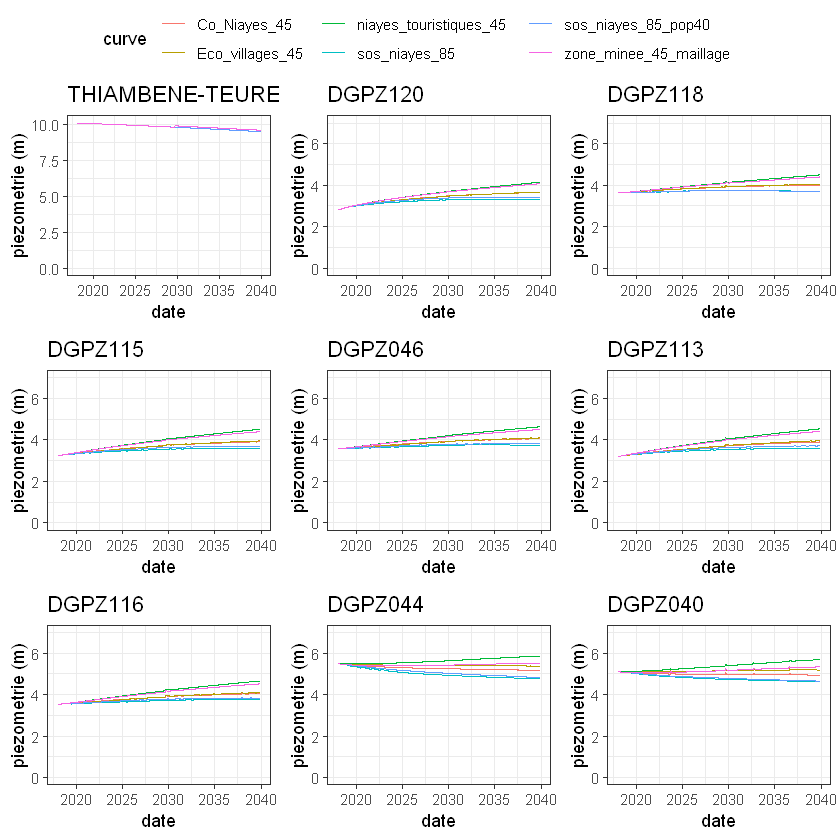


attr(,"class")
[1] "list"      "ggarrange"


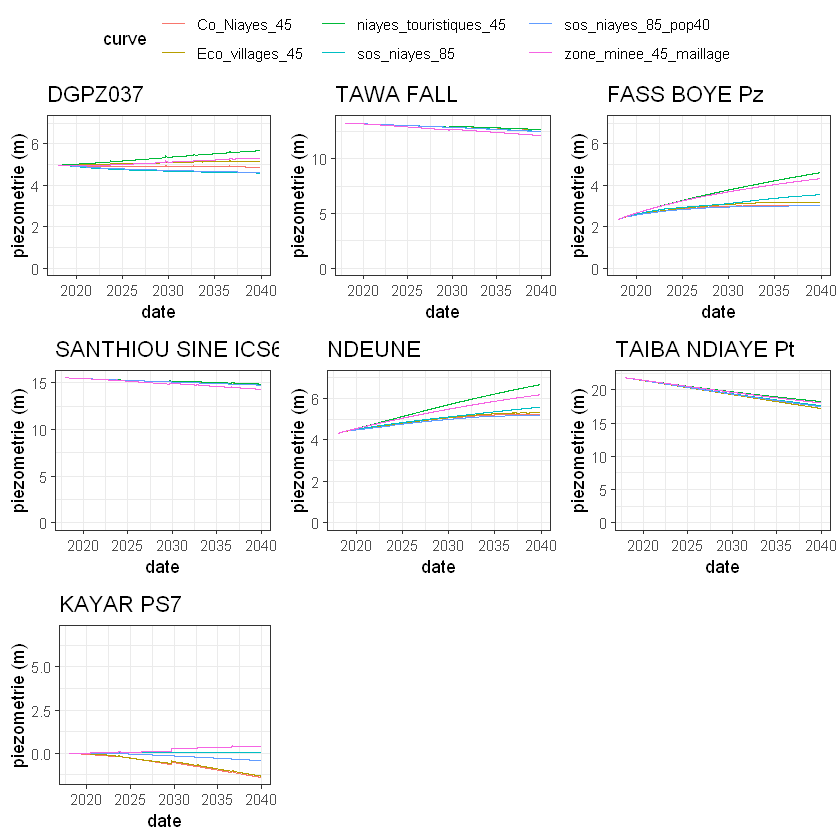

In [22]:
visuel <-visualisation(obs=FALSE,end="2040-12-31")

 [1] "sur les graphs on aura la station: DGPZ049"
 [2] "sur les graphs on aura la station: DGPZ045"
 [3] "sur les graphs on aura la station: DGPZ051"
 [4] "sur les graphs on aura la station: DGPZ114"
 [5] "sur les graphs on aura la station: DGPZ050"
 [6] "sur les graphs on aura la station: DGPZ110"
 [7] "sur les graphs on aura la station: DGPZ111"
 [8] "sur les graphs on aura la station: DGPZ042"
 [9] "sur les graphs on aura la station: DGPZ112"
[10] "sur les graphs on aura la station: DGPZ038"
[11] "sur les graphs on aura la station: DGPZ043"
[12] "sur les graphs on aura la station: DGPZ109"
[13] "sur les graphs on aura la station: DGPZ041"
[14] "sur les graphs on aura la station: DGPZ039"
[15] "sur les graphs on aura la station: DGPZ119"
[1] "visualisation%03d.tiff"


file saved to visualisation%03d.tiff



$`1`

$`2`


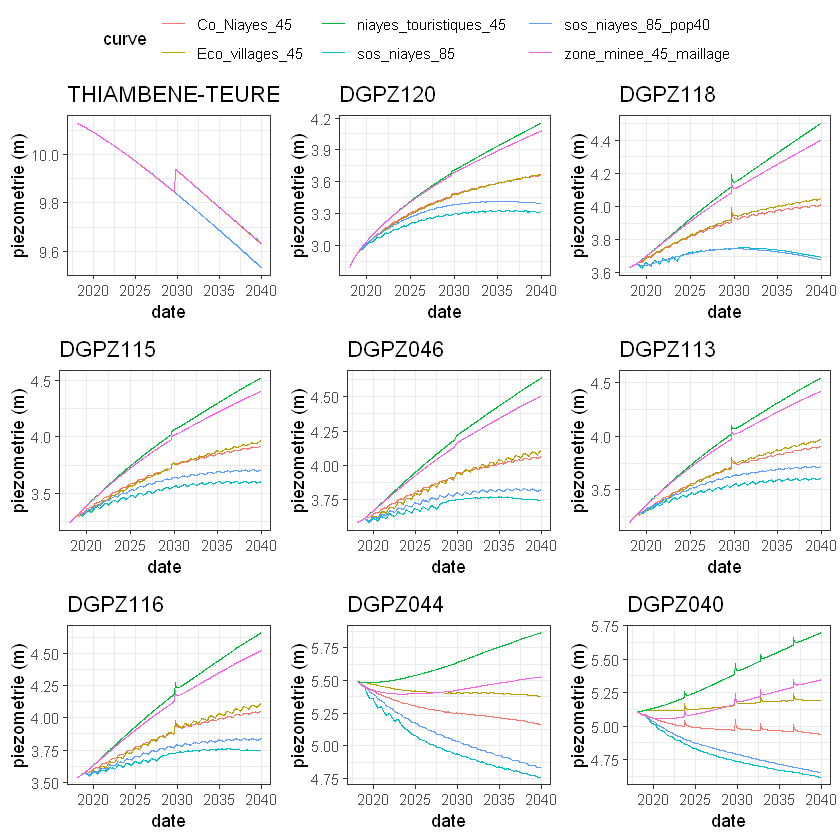


attr(,"class")
[1] "list"      "ggarrange"


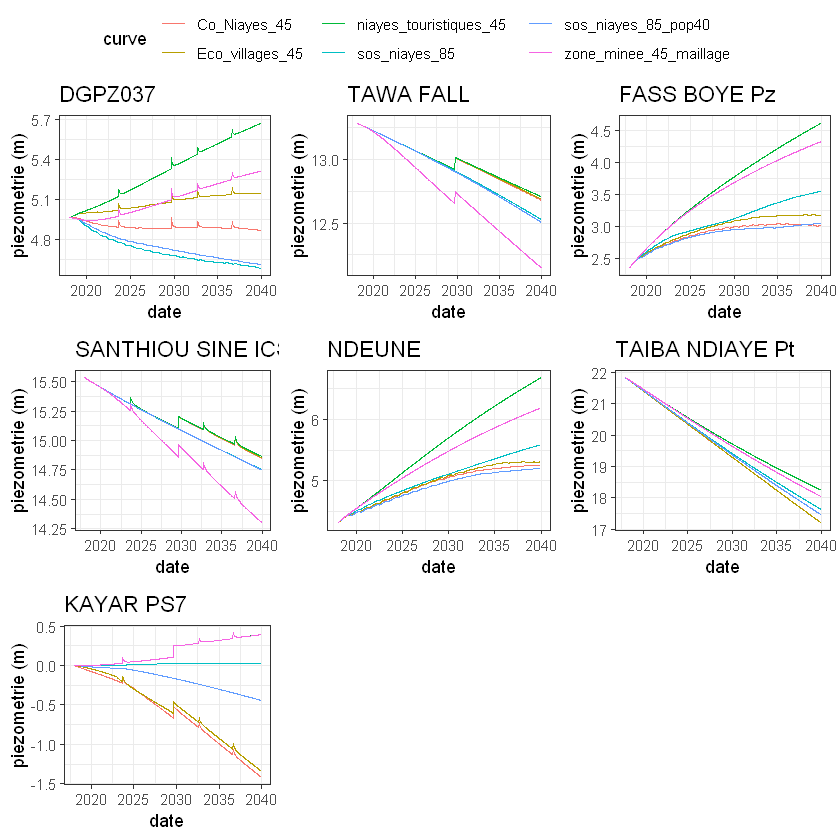

In [23]:
visuel <-visualisation(obs=FALSE,end="2040-12-31",y.lim="f")

### Visualisation Scénario Typologie

In [19]:
dir_senario="scenarios"

In [20]:
list.path.scen<-list.files(file.path(dir_senario,
                "exploitations"),full.names = TRUE)

var<-c("prod_tomate_tot","chou","aubergine",
       "carotte","oignon","piment","recette_tot")

noy<-unlist(unique(lapply(list.path.scen,pat)))
noy<-gsub("simul","",noy)
noy<-gsub("exploitations","",noy)

In [22]:
lp<-list()
for (i in 1:length(noy)){
    
    s<-split_bar8(noy[[i]])
    s<-paste(s[-length(s)],collapse="_")
    
    p<-Filter(function(x) grepl(s,x),
              list.path.scen)
    
    
    list.scen<-list()
    for (j in 1:length(p)){
        path.scen<-p[j]
        scen<-rcsv_sep(path.scen)
        scen<-subset(scen,select=c("id","year",var))
        names(scen)[names(scen)=='id']<-"producteurs"
        names(scen)[names(scen)=='prod_tomate_tot']<-"tomate"
        scen$scenario<-noy[[i]]
        list.scen[[j]]<-scen
    }
    
    #max_date<-unlist(lapply(list.scen,
              #function(x) max(x$year)))
    
    #d<-list.scen[order(unlist(max_date))]
            
    library(tidyverse)
    d<-list.scen %>% reduce(rbind)
    d<-d[-which(d$year=="year"),]
    d[1:(NCOL(d)-1)]<-data.frame(sapply(d[1:(NCOL(d)-1)],
                                        as.numeric))
    d<-d[order(d$year),]
    lp[[i]]<-d}

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [25]:
lpmax<-list()

for (m in 1:length(lp)){
    
    t<-lp[[m]]
    #st<-t[which(t$year==2011),-2]
    #max(t$year)
    st<-t
    st[1]<-data.frame(sapply(st[1],as.character))
    st[2]<-data.frame(sapply(st[2],as.character))
    
    st[3:dim(st)[2]-1]<-
    data.frame(sapply(st[3:dim(st)[2]-1],as.numeric))
    
    lpmax[[m]]<-st}

library(tidyverse)
dmax<-lpmax %>% reduce(rbind)

In [26]:
dmax["year"]<-data.frame(sapply(dmax["year"],as.character))

In [27]:
n<-which(names(dmax)!="year" &
         names(dmax)!="scenario" &
         names(dmax)!="producteurs")
b1<-dmax
b2<-dmax

In [ ]:
de<-function(x){
    e1<-split_bar8(x)
    e1<-e1[-length(e1)]
    e1<-paste(e1,collapse="_")
    e1}

In [68]:
b2$scenario<-lapply(b2$scenario, de)

In [ ]:
(b2$scenario)

In [63]:
library(ggplot2)
plobox<-list()

nario<-unique(b2$scenario)

for (i in 1:length(nario)){
    scenario<-nario[[i]]
    r<-b2[which(b2$scenario==scenario),]
    g<-ggplot(r, aes(year,piment,fill=scenario)) +
    labs(title="Piment")+
    geom_boxplot()
    plobox[[i]]<-g}

In [64]:
figure1 <- ggarrange(plotlist = plobox,ncol=4, 
                        nrow=4,common.legend = TRUE)
# Export to a pdf file
ggexport(figure1,filename =paste("box_piment",".tiff",sep=""))

[1] "box_piment%03d.tiff"


file saved to box_piment%03d.tiff



In [92]:
bx<-list()
j=0
for(i in n){
    
    j=j+1
    na<-names(b1)[i]
   ax<-ggplot(b1, aes(year,b1[na],fill=scenario)) +
    geom_boxplot()
    
    bx[[j]]<-ax
    
}

In [58]:
box <- ggarrange(plotlist =bx,ncol=3, 
                        nrow=3,common.legend = TRUE)
    # Export to a pdf file
    ggexport(box , filename =paste("box",".pdf",sep=""))
    print(bx)

ERROR: Error in ggarrange(plotlist = bx, common.legend = TRUE): objet 'bx' introuvable
